In [1]:
from model import create_model
from get_training_and_testing_data import get_images_and_labels
from extract_and_save_images import make_classes
from download_data import download_data
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
save_path = './images'
download_data(save_path)

In [3]:
downloaded_path = './images/downloads'
save_classes_path = './sketch-classes'
make_classes(downloaded_path, save_classes_path)

In [4]:
num_classes = 100
X, y, _ = get_images_and_labels(save_classes_path, num_classes)

 29%|████████████                              | 99/345 [02:26<06:04,  1.48s/it]


In [5]:
y = keras.utils.to_categorical(y, num_classes)

In [6]:
X = X.astype('float32') / 255.0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify=y)

In [8]:
image_shape = (28, 28, 1)
model = create_model(image_shape, num_classes)

2022-06-22 23:02:56.438889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 23:02:56.470433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 23:02:56.471082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 23:02:56.472227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [9]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [10]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_accuracy',
    restore_best_weights=True,
    verbose=1
)

In [11]:
# Dataset batching
batch_size = 2000
prefetch_buffer_batches = 10

# Training
epochs = 100
steps_per_epoch = 500

In [12]:
training_history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_split = 0.2,
    batch_size= batch_size,
    verbose = 1,
    callbacks=[
        early_stopping_callback
    ]
)

2022-06-22 23:02:57.175051: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1003520000 exceeds 10% of free system memory.
2022-06-22 23:02:57.810228: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1003520000 exceeds 10% of free system memory.


Epoch 1/100


2022-06-22 23:02:58.203927: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 128000000 exceeds 10% of free system memory.
2022-06-22 23:02:59.906657: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-06-22 23:03:01.022172: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-22 23:03:01.023142: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-22 23:03:01.023205: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-06-22 23:03:01.024103: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-22 23:03:01.024200: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Mod

159/160 [============================>.] - ETA: 0s - loss: 3.5305 - accuracy: 0.3214

2022-06-22 23:03:07.123148: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 250880000 exceeds 10% of free system memory.
2022-06-22 23:03:07.317668: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 250880000 exceeds 10% of free system memory.


160/160 [==============================] - 10s 35ms/step - loss: 3.5248 - accuracy: 0.3224 - val_loss: 2.6268 - val_accuracy: 0.4724
Epoch 2/100
160/160 [==============================] - 5s 32ms/step - loss: 2.4792 - accuracy: 0.5114 - val_loss: 2.3953 - val_accuracy: 0.5282
Epoch 3/100
160/160 [==============================] - 5s 32ms/step - loss: 2.3056 - accuracy: 0.5526 - val_loss: 2.2549 - val_accuracy: 0.5616
Epoch 4/100
160/160 [==============================] - 5s 32ms/step - loss: 2.1994 - accuracy: 0.5791 - val_loss: 2.1571 - val_accuracy: 0.5887
Epoch 5/100
160/160 [==============================] - 5s 33ms/step - loss: 2.1316 - accuracy: 0.5945 - val_loss: 2.1152 - val_accuracy: 0.6017
Epoch 6/100
160/160 [==============================] - 5s 33ms/step - loss: 2.0838 - accuracy: 0.6064 - val_loss: 2.1019 - val_accuracy: 0.6015
Epoch 7/100
160/160 [==============================] - 5s 33ms/step - loss: 2.0325 - accuracy: 0.6175 - val_loss: 2.0407 - val_accuracy: 0.6147
Epo

In [13]:
test_loss, test_prec = model.evaluate(X_test, y_test)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.6547 - accuracy: 0.6913


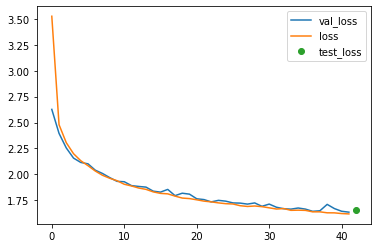

In [14]:
plt.plot(training_history.epoch, training_history.history['val_loss'])
plt.plot(training_history.epoch, training_history.history['loss'])
plt.plot(len(training_history.epoch), test_loss, 'o')
plt.legend(['val_loss', 'loss', 'test_loss'])

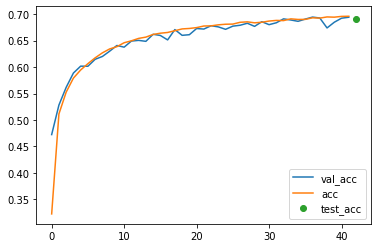

In [15]:
plt.plot(training_history.epoch, training_history.history['val_accuracy'])
plt.plot(training_history.epoch, training_history.history['accuracy'])
plt.plot(len(training_history.epoch), test_prec, 'o')
plt.legend(['val_acc', 'acc', 'test_acc'])

In [16]:
model.save('sketch_classifier.h5')